,buying,maint,doors,persons,lug_boot,safety,Class Values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


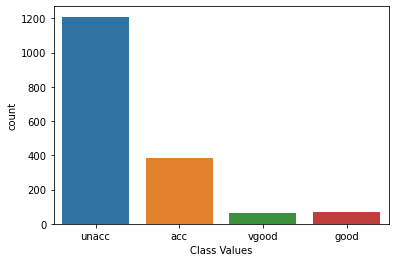

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns

temp = pd.read_csv(r"E:\Dataset\car.data",
                   names=[
                       "buying", "maint", "doors", "persons", "lug_boot",
                       "safety", "Class Values"
                   ])
sns.countplot(x='Class Values', data=temp)
temp.head()

d:\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,UserID,MovieID,Rating,Datetime
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11


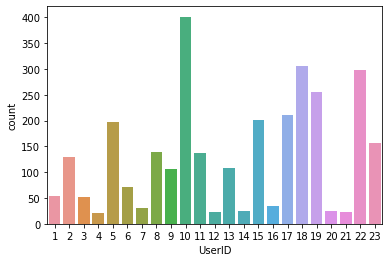

In [64]:
file_path = r"E:\Dataset\ml-1m\ratings.dat"
dataset = pd.read_csv(
    file_path,
    delimiter='::',  #分割符
    names=["UserID", "MovieID", "Rating", "Datetime"])
dataset["Datetime"] = pd.to_datetime(dataset["Datetime"], unit='s')
sns.countplot(x='UserID', data=dataset[:3000])
dataset.head()

In [82]:
dataset["Favorable"] = dataset["Rating"] > 4
rating = dataset[dataset['UserID'].isin(range(200))]
favorable_ratings = rating[rating["Favorable"]]
favorable_reviews_by_users = dict(
    (k, frozenset(v.values))
    for k, v in favorable_ratings.groupby("UserID")["MovieID"])
num_favorable_by_movie = rating[["MovieID",
                                 "Favorable"]].groupby("MovieID").sum()
num_favorable_by_movie.sort_values(by='Favorable', ascending=False)[:5]


,Favorable
MovieID,
2858,67
260,60
2028,54
1196,51
1198,48


In [86]:
temp=favorable_ratings.groupby("UserID")
temp["MovieID"].head()

0        1193
4        2355
6        1287
7        2804
10        595
         ... 
28992    1256
28996    1259
28997     589
29008    1197
29018    1270
Name: MovieID, Length: 968, dtype: int64